In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime
import pandas_datareader.data as web

In [5]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 4)
btc = web.DataReader('BTC-USD','yahoo', start, end)

In [6]:
btc = btc[~btc.index.duplicated(keep='first')]

In [7]:
btc = btc.drop(columns=['High','Low','Open','Close','Volume'])

In [8]:
btc.columns = ['Price']

In [9]:
btc = btc.reset_index()

In [10]:
r = pd.date_range(start=btc.Date.min(), end=btc.Date.max())
btc = btc.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [11]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date',inplace=True)

In [12]:
btc = btc.fillna(method='ffill')
btc = btc.fillna(method='bfill')

In [13]:
btc = btc.loc['2019-09-27':'2020-10-04']

In [14]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 4)
dxy = web.DataReader('DX-Y.NYB','yahoo', start, end)

In [15]:
dxy = dxy.loc['2019-09-27':'2020-10-04']

In [16]:
dxy = dxy.drop(columns=['High','Low','Open','Close','Volume'])

In [17]:
dxy.columns = ['Price']

In [18]:
dxy = dxy.reset_index()

In [19]:
r = pd.date_range(start=dxy.Date.min(), end=dxy.Date.max())
dxy = dxy.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [20]:
dxy['Date'] = pd.to_datetime(dxy['Date'])
dxy.set_index('Date',inplace=True)

In [21]:
dxy = dxy.fillna(method='ffill')
dxy = dxy.fillna(method='bfill')

In [22]:
frames = [btc,dxy]

In [23]:
btc_dxy = pd.concat(frames,sort=False,axis=1)

In [24]:
btc_dxy.columns = ['BTC','DXY']

In [25]:
btc_dxy = btc_dxy.fillna(method='ffill')
btc_dxy = btc_dxy.fillna(method='bfill')

In [26]:
btc_dxy = btc_dxy.reindex(columns = ['DXY', 'BTC'])

In [27]:
x = btc_dxy.iloc[:,:-1].values
y = btc_dxy.iloc[:,-1].values

In [28]:
y = y.reshape(len(y),1)

In [29]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
x = ss_x.fit_transform(x)
y = ss_y.fit_transform(y)

In [30]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [31]:
ss_y.inverse_transform(regressor.predict(ss_x.transform([[93.43]])))

array([11147.47595893])

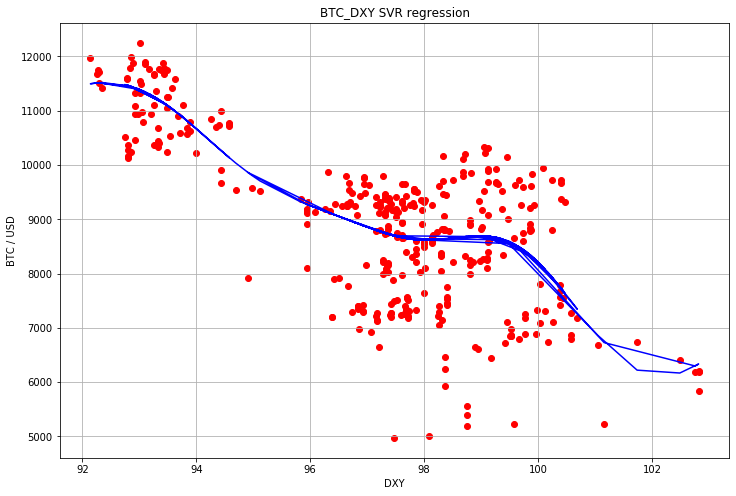

In [32]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(ss_x.inverse_transform(x), ss_y.inverse_transform(y), color='red')
plt.plot(ss_x.inverse_transform(x), ss_y.inverse_transform(regressor.predict(x)),color='blue')
plt.title('BTC_DXY SVR regression')
plt.xlabel('DXY')
plt.ylabel('BTC / USD')
plt.show()